## Curse of dimensionality walkthrough
This notebook will help to develop intuitions about a phenomena called the "curse of dimensionality"
- As dimension number increases, traditional intuitions about "closeness" and "volume" associated with 1, 2, and 3 dimensions tend to break down
- One way to think of this is that as dimensionality increases, distances functions seem to lose their ability to distinguish closeness.  
	- The practical effect of this is that the distances between sample points seem to all become equally far apart as dimension increases.
- A second practical result of the curse of dimensionality is that for high dimension, "most of the volume" of a high dimensional figure (e.g. a hyper-cube) will be located at the margins.
- Specifically, in this exercise, we will walk through a sequence of "hyper-cubes" of increasing dimensionality, removing a doughnut hole with 90% of the length.
	- We will see that even though we are removing doughnut holes that have 90% of the edge length, as **d** grows large, most of the volume will lie in the margins.

In [2]:
# prep material
import matplotlib.pyplot as plt
%matplotlib inline

### 1-dim case
- We begin with a 1-unit hypercube in 1 dimension (i.e a line), and then remove a .9 length segment in the middle.


In [8]:
# set the dimension and edge length
d = 1
edgeLen = 1
marginRatio = .05

TotVolume = edgeLen**d 

HoleLen = edgeLen*(1-marginRatio)

HoleVolume = HoleLen**d 

print("When dimension = " + str(d) + " and the margins are " + str(marginRatio*100) + "% of the total edge length:")
print("   Total volume = " + str(TotVolume))
print("   Hole volume = " + str(HoleVolume))
print("   So as a ratio this means " + str(100*(TotVolume - HoleVolume)/TotVolume) + "% of the volume is in the margins.")

When dimension = 1 and the margins are 5.0% of the total edge length:
   Total volume = 1
   Hole volume = 0.95
   So as a ratio this means 5.000000000000004% of the volume is in the margins.


### Generalize for d > 1
Lets build a custom function to do this for arbitrary of dimensions

In [9]:
def hyperMarginRatio(d = 1, marginRatio = .05, edgeLen = 1):
    TotVolume = edgeLen**d 

    HoleLen = edgeLen*(1-marginRatio)
    HoleVolume = HoleLen**d 

    marginRatio = (TotVolume - HoleVolume)/TotVolume
    
    print("When dimension = " + str(d) + " and the margins are " + str(marginRatio*100) + "% of the total edge length:" )
    print("   Total volume = " + str(TotVolume))
    print("   Hole volume = " + str(HoleVolume))
    print("   So as a ratio,")
    print(str(100*marginRatio) + "% of the volume is in the margins.\n")
    return marginRatio
    
    

### 2-dim case

In [13]:
d2 = hyperMarginRatio(d = 5)

When dimension = 5 and the margins are 22.621906250000023% of the total edge length:
   Total volume = 1
   Hole volume = 0.7737809374999998
   So as a ratio,
22.621906250000023% of the volume is in the margins.



### n-dim case

So for the 2 dimension case, we see that around 19% is in the margins.
Now lets loop through n = 1,2,3,... to see how this ratio increases with dimension number:


In [23]:
maxD = 50
marginRatio = .05


marginRatios = []
X = range(1,maxD+1)

for d in X:
    appenders = round(hyperMarginRatio(d, marginRatio = marginRatio), 2)
    marginRatios.append(appenders)

print(marginRatios)

When dimension = 1 and the margins are 5.000000000000004% of the total edge length:
   Total volume = 1
   Hole volume = 0.95
   So as a ratio,
5.000000000000004% of the volume is in the margins.

When dimension = 2 and the margins are 9.750000000000004% of the total edge length:
   Total volume = 1
   Hole volume = 0.9025
   So as a ratio,
9.750000000000004% of the volume is in the margins.

When dimension = 3 and the margins are 14.262500000000012% of the total edge length:
   Total volume = 1
   Hole volume = 0.8573749999999999
   So as a ratio,
14.262500000000012% of the volume is in the margins.

When dimension = 4 and the margins are 18.549375000000012% of the total edge length:
   Total volume = 1
   Hole volume = 0.8145062499999999
   So as a ratio,
18.549375000000012% of the volume is in the margins.

When dimension = 5 and the margins are 22.621906250000023% of the total edge length:
   Total volume = 1
   Hole volume = 0.7737809374999998
   So as a ratio,
22.621906250000023%

Text(0.5,1,'Ratio of margins volume as a function of dimension')

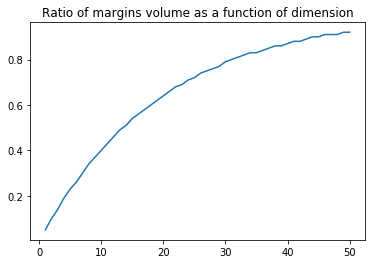

In [24]:
plt.plot(X,marginRatios)
plt.title('Ratio of margins volume as a function of dimension')

As we can see, when the margins are constructed by removing 90% of the edge length, 
- The majority of the volume remains in the margin region of the remainder of the hyper-cube for dimensionality over d = 6.
- And over 99% of the volume remains in the 10% margin region for d > 44.

In [ ]:
### Exercise:
# Develop your intuitions about high dimensional volumes by using our custom function for other edge margin values (e.g.  instead of .1 try .05, or .01…) how does this effect the curve?
